## Наша модель


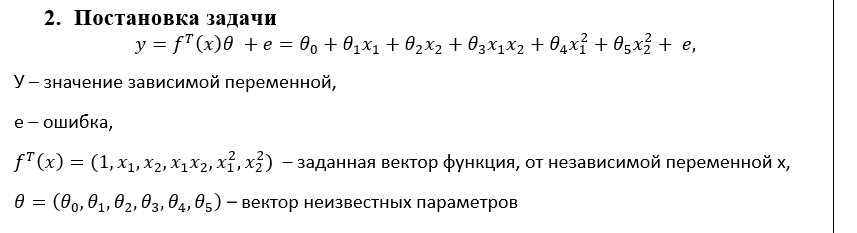

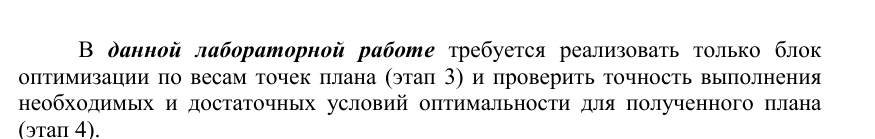


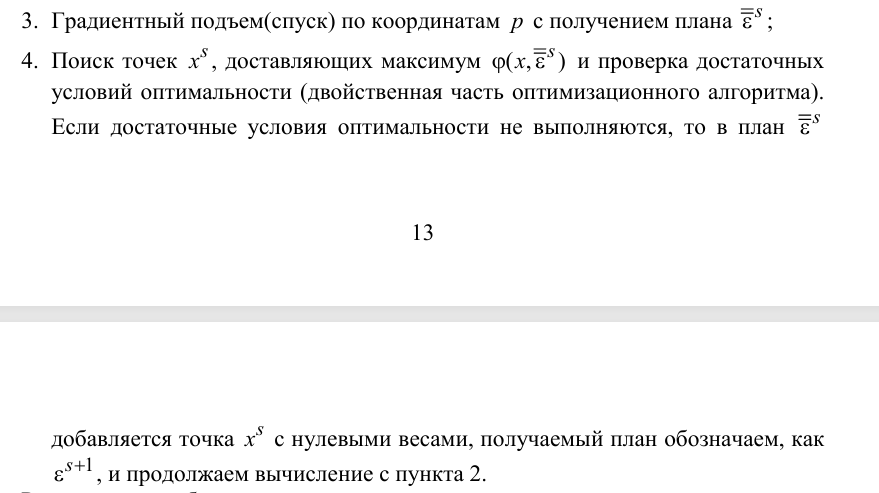

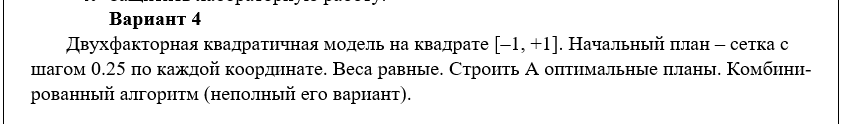

In [154]:
%precision 3

'%.3f'

In [155]:
#импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [156]:
#параметры, постоянные
m=6#насколько я поняла - это по факту размер нашего вектора иксов\тет
n = 81# с шагом 0.25 у нас будет выходить это
p = [1/n] * n # веса равные, равны вот этому

In [157]:
#наша функция
def f(x1,x2):
    func = np.array([[1],[x1],[x2],[x1*x2],[x1**2],[x2**2]])
    return func

In [158]:
#создаем наш x
x1 = np.arange(-1,1.1,0.25)
x2 = np.arange(-1,1.1,0.25)
x = []
for i in range(len(x1)):
    for j in range(len(x2)):
        x.append([round(x1[i],2), round(x2[j],2)])
x = np.array(x)


In [159]:
len(x)

81

In [160]:
np.shape(f(0,1))

(6, 1)

In [161]:
x[0]

array([-1., -1.])

In [162]:
def Mcalc(x, p):
    M = np.zeros([m, m])
    for i in range(n):
        M += p[i] * f(x[i][0], x[i][1]) @ f(x[i][0], x[i][1]).T
    return M

def Mx(x):
    Mx = np.zeros([m, m])
    for i in range(n):
        Mx += f(x[i][0], x[i][1]) @ f(x[i][0], x[i][1]).T
    return Mx

In [163]:
M = Mcalc(x, p)

In [164]:
def A_functional(M):
    return -np.trace(np.linalg.inv(M))

In [165]:
def grad_func_A(M, x):
    grad = np.zeros(n)
    T1 = np.linalg.matrix_power(np.linalg.inv(M), 2)
    for i in range(n):
        grad[i] -= np.trace(T1 @ f(x[i][0], x[i][1]) @ f(x[i][0], x[i][1]).T)
    return grad / np.linalg.norm(grad)

In [166]:
fi = grad_func_A(M, x)
fi

array([-0.2921172 , -0.16119113, -0.11778145, -0.11177922, -0.11311908,
       -0.11177922, -0.11778145, -0.16119113, -0.2921172 , -0.16119113,
       -0.0630459 , -0.04305112, -0.05109783, -0.05712067, -0.05109783,
       -0.04305112, -0.0630459 , -0.16119113, -0.11778145, -0.04305112,
       -0.03978126, -0.05786293, -0.06723075, -0.05786293, -0.03978126,
       -0.04305112, -0.11778145, -0.11177922, -0.05109783, -0.05786293,
       -0.08196557, -0.09334038, -0.08196557, -0.05786293, -0.05109783,
       -0.11177922, -0.11311908, -0.05712067, -0.06723075, -0.09334038,
       -0.10538418, -0.09334038, -0.06723075, -0.05712067, -0.11311908,
       -0.11177922, -0.05109783, -0.05786293, -0.08196557, -0.09334038,
       -0.08196557, -0.05786293, -0.05109783, -0.11177922, -0.11778145,
       -0.04305112, -0.03978126, -0.05786293, -0.06723075, -0.05786293,
       -0.03978126, -0.04305112, -0.11778145, -0.16119113, -0.0630459 ,
       -0.04305112, -0.05109783, -0.05712067, -0.05109783, -0.04

In [167]:
q = n - np.count_nonzero(p) # Количество не нулевых компонент
mean_no0 = 0
for i in range(n):
    if p[i] != 0:
        mean_no0 += fi[i]
mean_no0 /= (n - q)
mean_no0

-0.09479477598939784

In [168]:
#Проверка достаточного условия
neccocaryCond = True
Grd = []
for i in range(n):
    Grd.append(mean_no0 - fi[i])
    if p[i] and mean_no0 - fi[i] <= 0:
        neccocaryCond = False
pp = p
if neccocaryCond == 0:
    lyambda = 0.5
    for i in range(n):
        p[i] +=  lyambda * Grd[i]


# Так а теперь всё в одну функцию запихиваю

In [169]:
def gradient_plan_A(p, x):
    neccocaryCond = False
    iterNum = 0
    iterProc = []
    kMax = 10000
    while neccocaryCond == 0 and iterNum < kMax:
        
        # Проверяем условия оптимальности
        
        M = Mcalc(x, p)
        t1 = np.trace(np.linalg.matrix_power(np.linalg.inv(M), 2) @ Mx(x))
        t2 = np.trace(np.linalg.inv(M))
        errAbs = abs (t1 - t2)
        if errAbs < 1e-5:
            neccocaryCond = True
        iterProc.append([iterNum, A_functional(M), errAbs, sum(p)])
        if (iterNum % 100)==0:
            print(iterProc[-1])
        iterNum += 1

        fi = grad_func_A(M, x) 
        
        # Количество не нулевых компонент
        mean_no0 = np.sum(fi[i] for i in range(n) if p[i] != 0) / np.count_nonzero(p)

        #Проверка необходимого условия
        neccocaryCond = True
        Grd =   fi - mean_no0
        for i in range(n):
            if p[i] != 0 and abs(mean_no0 - fi[i]) > 1e-5:
                neccocaryCond = False
                break
        # Достаточные
        for i in range(n):
            if p[i] <= 1e-5:
                if Grd[i] < 1e-5:
                    neccocaryCond = 0
                else:
                    Grd[i] == 0

        if neccocaryCond == 0:
            lyambda = 0.1
            for i in range(n):
                if(Grd[i] < 0 and lyambda > abs(p[i] / Grd[i])):
                    lyambda = - p[i] / Grd[i]
            for i in range(n):
                p[i] -=  lyambda * Grd[i]

    return p


In [170]:
print(" i", " A(->max)", " необходимо и достаточно (->0)")
p0 = gradient_plan_A(p, x)
print(p0)
total = sum(p0)
p1 = [x / total for x in p0]

 i  A(->max)  необходимо и достаточно (->0)
[0, -239.26330510931044, 943866.2985898951, 1.0000000000000009]


C:\Users\aser\AppData\Local\Temp\ipykernel_7472\3818481021.py:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  mean_no0 = np.sum(fi[i] for i in range(n) if p[i] != 0) / np.count_nonzero(p)


[100, -1.1303119828093204, 470.0290014975239, 1.0000000000000016]
[200, -1.604830687441909, 301.62965421020164, 0.9999999999999973]
[300, -1.602200675291225, 266.48842303507695, 1.0000000000000022]
[400, -1.6905659424234505, 217.66389391277357, 1.0000000000000062]
[500, -1.7673801482671694, 172.57446463362282, 1.0000000000000038]
[600, -1.7391557042601828, 159.8692520763321, 1.0000000000000027]
[700, -1.7904270471740822, 134.86140694535828, 1.0]
[800, -1.7355337195860387, 131.72335987862584, 0.9999999999999991]
[900, -1.7337673714876223, 119.41480565806273, 1.0000000000000009]
[1000, -1.7403421619947372, 109.16882296090964, 0.9999999999999958]
[1100, -1.715560538606087, 105.84202682754365, 0.9999999999999931]
[1200, -1.697677580418187, 101.45320073739636, 0.9999999999999909]
[1300, -1.684629161712184, 96.46317465302118, 0.9999999999999905]
[1400, -1.6759750336769064, 91.98518692797157, 0.9999999999999889]
[1500, -1.6675624383700263, 89.05769023443806, 0.9999999999999885]
[1600, -1.6557